# Playground series season 4, episode 2

The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question.

The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), and Consumption of alcohol (CALC). The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS)

Load initial libraries:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

We load the initial dataset:

In [2]:
train = pd.read_csv('train.csv')
train.set_index('id',inplace = True)

In [3]:
train.head()

print('The size of the data set is:', train.shape)

The size of the data set is: (20758, 17)


#### Training dataset imbalance

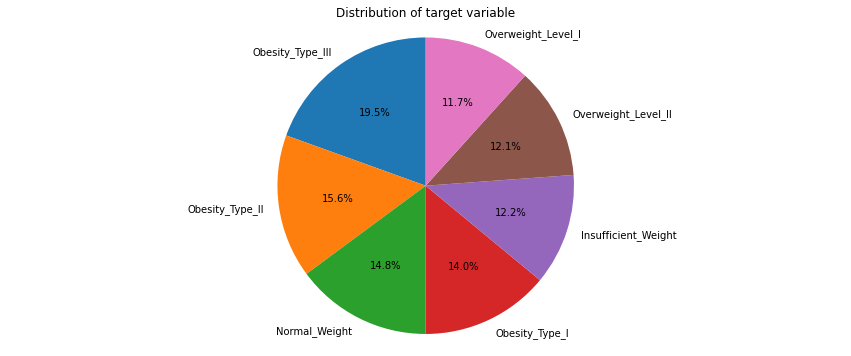

In [4]:
plt.figure(figsize=(15, 6))
plt.pie(train.NObeyesdad.value_counts(),labels = train.NObeyesdad.value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of target variable')
plt.axis('equal') 

plt.show()

We can see it's a pretty balanced dataset. The first minority is Obesity type III, we'll see if the model is biased against it at the point of training.

### Duplicate values

In [5]:
print("There are", train.duplicated().sum(), "duplicate values.")

There are 0 duplicate values.


#### NaN Counts

In [6]:
pd.DataFrame(train.isna().sum(), columns = ["NaN counts"])

,NaN counts
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


### BMI feature creation

As we are measuring obesity, we'll create the body mass index (BMI) feature, defined as:

\begin{equation}
BMI = \frac{weight (kg)}{height (m)^2}
\end{equation}

In [7]:
train["BMI"] = train["Weight"]/(train["Height"]**2)

# Numerical variables analysis

In [8]:
train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
id,,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151


In [9]:
numerical_vars = ['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE','BMI']

desc_df = train[numerical_vars].describe().transpose()
desc_df['cov'] = desc_df['std']/desc_df['mean']
desc_df

,count,mean,std,min,25%,50%,75%,max,cov
Age,20758.0,23.841804,5.688072,14.000000,20.000000,22.815416,26.000000,61.000000,0.238576
Height,20758.0,1.700245,0.087312,1.450000,1.631856,1.700000,1.762887,1.975663,0.051353
Weight,20758.0,87.887768,26.379443,39.000000,66.000000,84.064875,111.600553,165.057269,0.300149
FCVC,20758.0,2.445908,0.533218,1.000000,2.000000,2.393837,3.000000,3.000000,0.218004
NCP,20758.0,2.761332,0.705375,1.000000,3.000000,3.000000,3.000000,4.000000,0.255447
CH2O,20758.0,2.029418,0.608467,1.000000,1.792022,2.000000,2.549617,3.000000,0.299823
FAF,20758.0,0.981747,0.838302,0.000000,0.008013,1.000000,1.587406,3.000000,0.853888
TUE,20758.0,0.616756,0.602113,0.000000,0.000000,0.573887,1.000000,2.000000,0.976258
BMI,20758.0,30.241842,8.333932,12.868541,24.088223,29.384757,37.011168,54.997991,0.275576


### Key takeaways

- We see variables have overall a high coefficient of variance (CoV), indicating that datapoints are more sparse.
- Age, weight, NCP, FAF and TUE seemed to be skewed to the left, while FCVC and CH2O seem to be skewed to the right.

## Variable Histograms

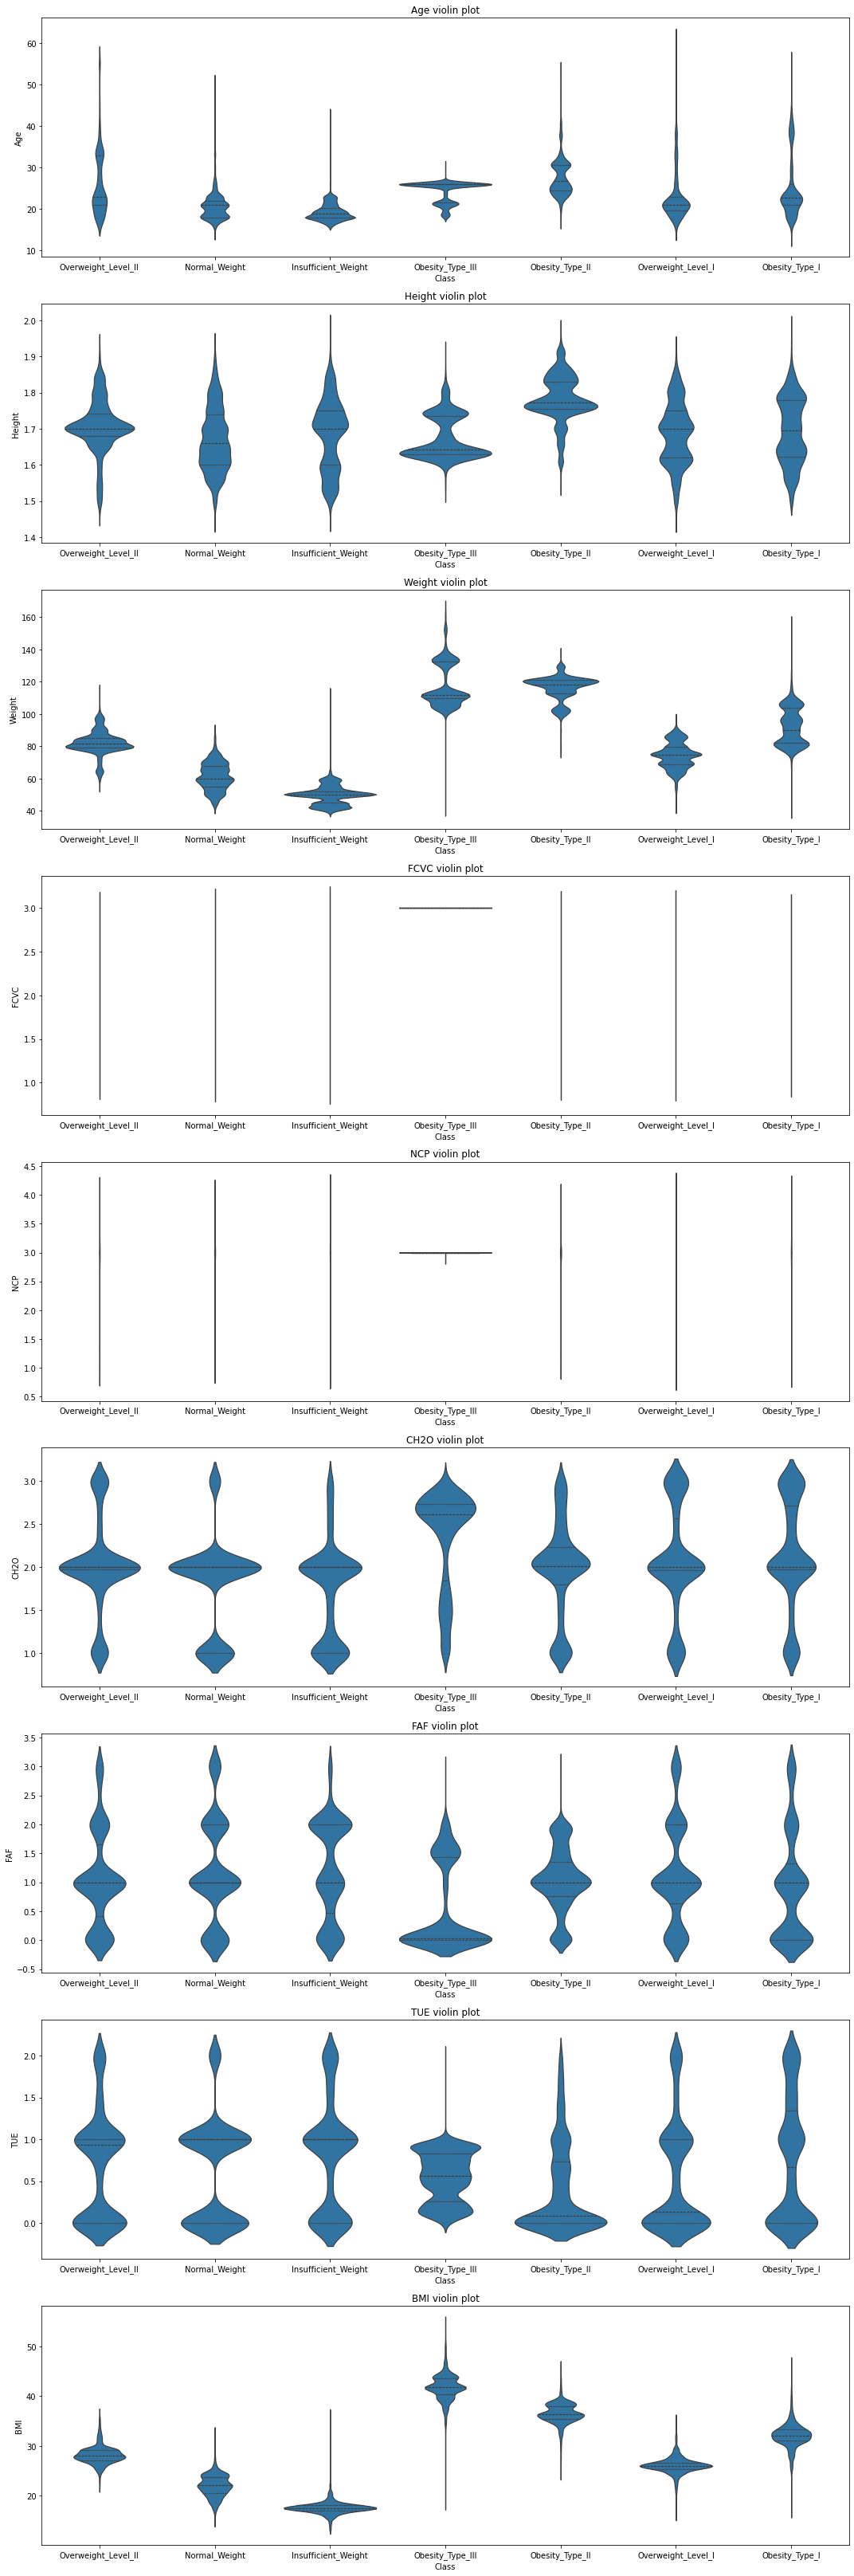

In [10]:
ncols = 1

# Calculate the number of rows needed based on the number of columns
nrows = -(-len(numerical_vars) // ncols)  # Ceiling division to get the number of rows

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the 2D array of subplots to a 1D array for easier indexing
axes = axes.flatten()
for i, variable in enumerate(numerical_vars):
    ax = axes[i]
    sns.violinplot(x='NObeyesdad', y=variable, data=train, inner='quartile', ax = ax)
    ax.set_title(variable+' violin plot')
    ax.set_xlabel('Class')
    ax.set_ylabel(variable)

# Remove empty subplots
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Key takeaways

- We see that obesity type III is clearly differenciated from other categories in most features.
- BMI shows a great differenciation, which makes sense as sometimes it is a driver for these categories. Obviously then body morphology is taken into consideration from a proffessional standpoint, so let's expect the model to carry that out.
- FCVC and NCP look weird, let's have a deeper look into it.

In [11]:
train.FCVC.value_counts()

FCVC
3.000000    7658
2.000000    7653
1.000000     275
2.967300     121
2.766612      54
            ... 
2.443674       1
1.111887       1
1.595746       1
2.577427       1
2.731368       1
Name: count, Length: 934, dtype: int64

In [12]:
train.NCP.value_counts()

NCP
3.000000    14706
1.000000     1976
4.000000      715
2.993623       39
2.695396       25
            ...  
3.608850        1
1.193486        1
2.737620        1
3.019574        1
2.256119        1
Name: count, Length: 689, dtype: int64

As there is density concentrated in single points, this is showing the violin plots as a continuous line. Besides, we see that obesity values show a high concentration in these main values. These is because these variables correspond to Frequency of consumption of vegetables (FCVC) and Number of main meals (NCP). These are generally integers, unless one calculates this as an average per week/month. Common responses will generaly be whole numbers.

## Correlation Matrix

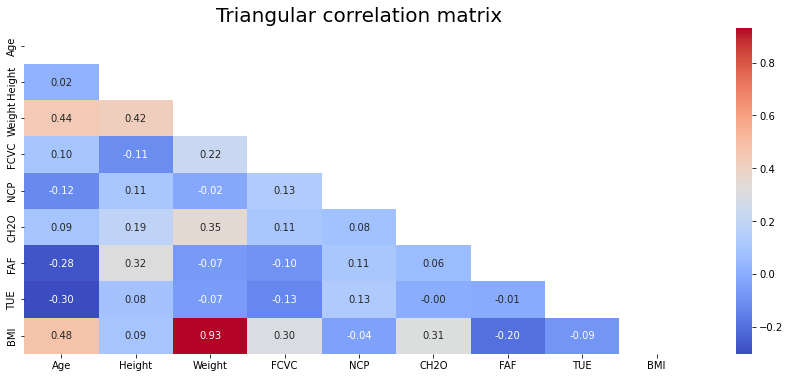

In [13]:
correlation_matrix = train[numerical_vars].corr(method = 'spearman')
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)
plt.title('Triangular correlation matrix', size = 20)
plt.show()

## Key takeaways

- No outstanding correlations. BMI is highly correlated with weight because is is proportional to weight, with a varying parameter per row. Since height values are constrained and not very sparse, BMI can be an estimation of scaling weight, but we'll consider it as it's important row-wise.

## Pairwise relationships

<Figure size 864x2880 with 0 Axes>

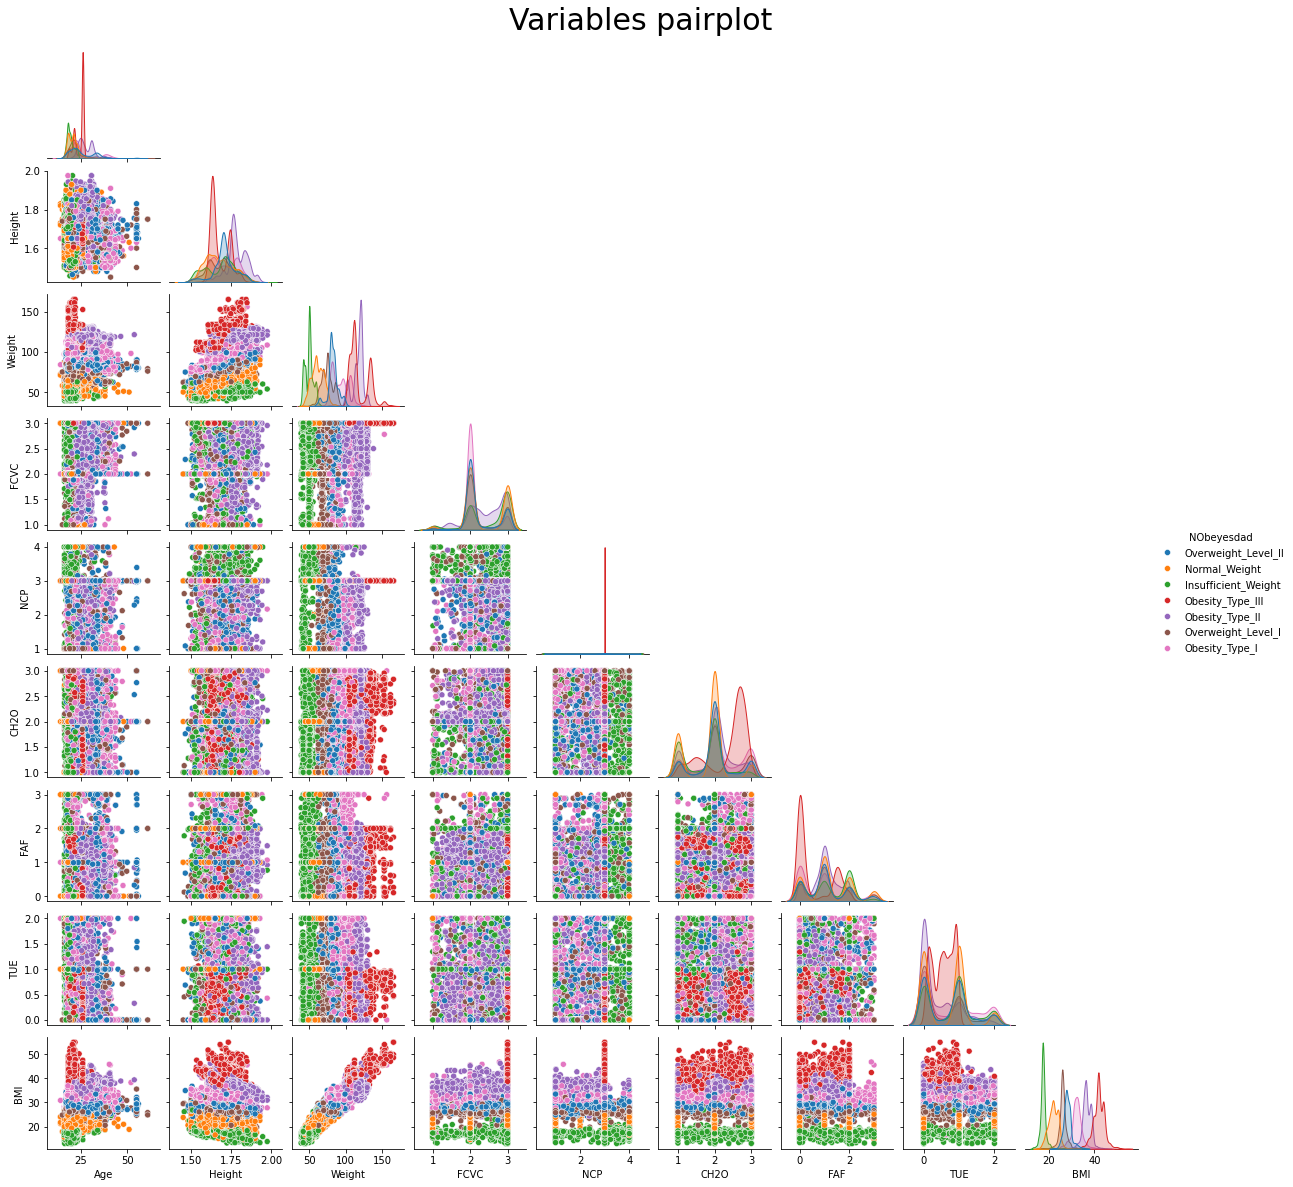

In [14]:
plt.figure(figsize=(12, 40))
pp = sns.pairplot(
    data = train[numerical_vars + ["NObeyesdad"]],
    hue='NObeyesdad',
    kind="scatter",
    diag_kind='kde',
    height=1.8,
    corner = True
);
pp.fig.suptitle("Variables pairplot", y=1.02, fontsize = 30)
plt.show()
plt.close()

### Key takeaways

- We see similar separation trends as we've seen before. The measured variables seem to be adding to the separation in some of the cases, but nothing additional which is outstanding.

# Categorical variable analysis

In [15]:
train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
id,,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151


## Bar plots

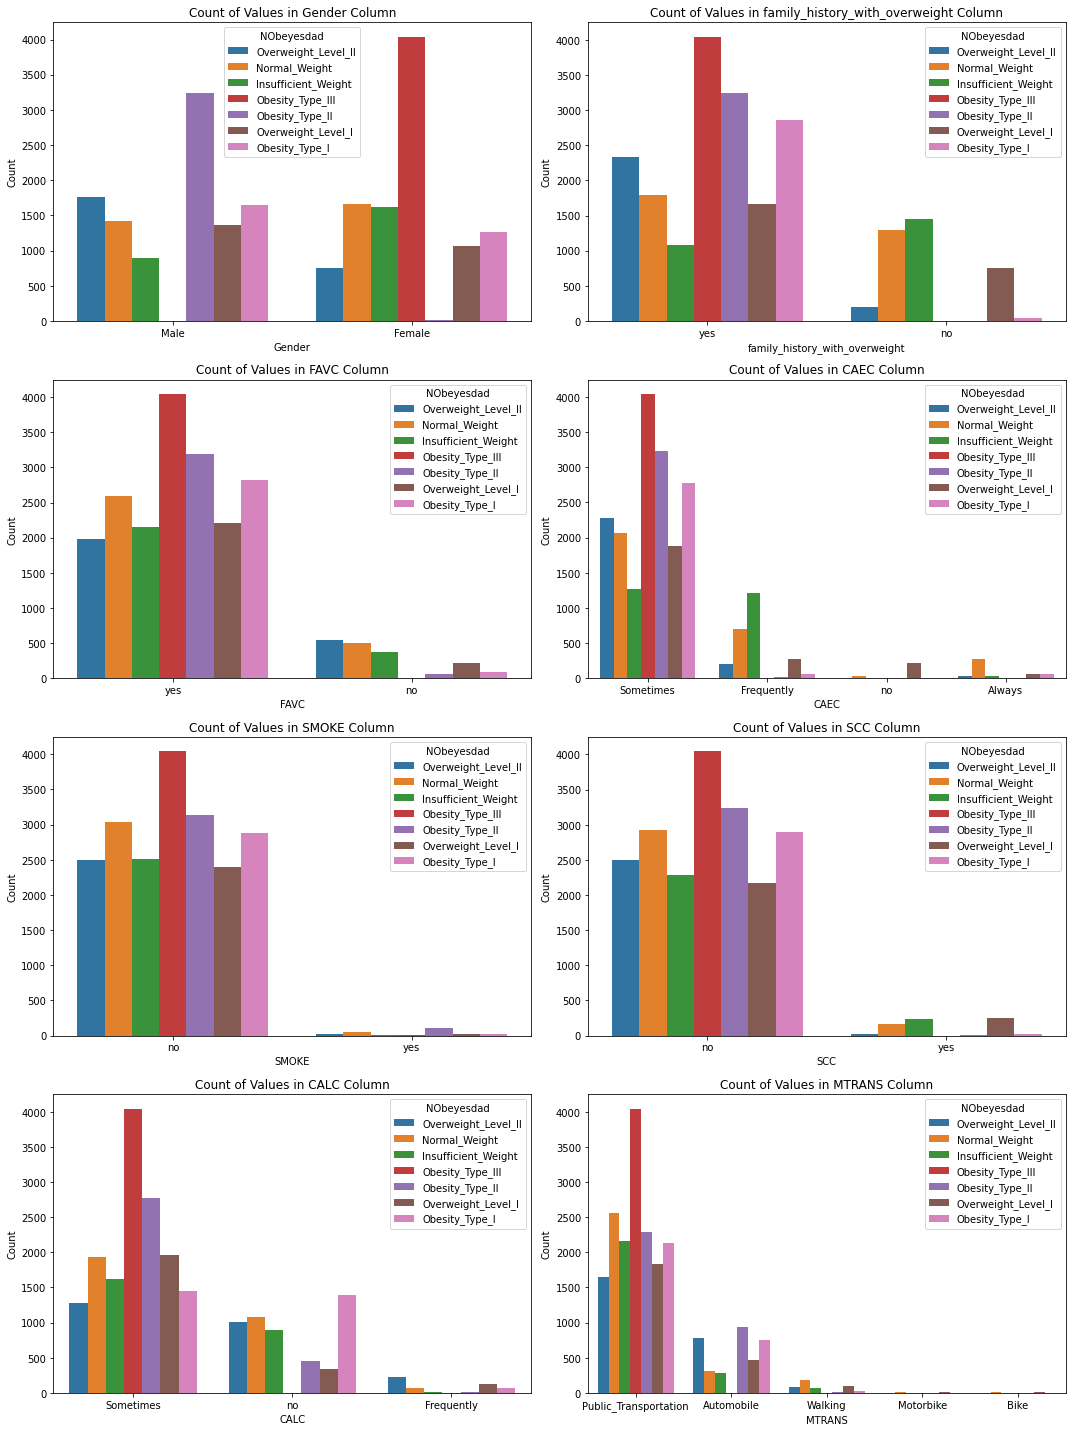

In [16]:
categorical_vars = ["Gender", "family_history_with_overweight", "FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"]

df_cat = train[categorical_vars]

ncols = 2

# Calculate the number of rows needed based on the number of columns
nrows = -(-len(df_cat.columns) // ncols)  # Ceiling division to get the number of rows

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the 2D array of subplots to a 1D array for easier indexing
axes = axes.flatten()

# Loop through columns and create bar plots
for i, column in enumerate(df_cat.columns):
    ax = axes[i]
    bars = sns.countplot(x=column, data=train, hue = "NObeyesdad", ax=ax, hue_order = list(train.NObeyesdad.unique()))
    
    ax.set_title(f'Count of Values in {column} Column')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

# Remove empty subplots
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Key takeaways

- This dataset just has female on obesity type III, and there's a clear differenciation on all of these features.
- We see that the classes which tend to differentiate are the ones which are not obesity, while obesity classes tend to follow the worst practices.

# Train df build

Build binary features for categorical:

In [17]:
train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
id,,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151


In [18]:
train_df = pd.get_dummies(train, columns = ["Gender","family_history_with_overweight","FAVC","SMOKE","SCC"],
                             prefix = ["Gender","family_history_with_overweight","FAVC","SMOKE","SCC"], drop_first = True)

train_df = pd.get_dummies(train_df, columns = ["CAEC","CALC", "MTRANS"],prefix = ["CAEC","CALC", "MTRANS"])

train_df = train_df.drop('NObeyesdad',axis = 1).astype('float64')

train_df['NObeyesdad'] = train['NObeyesdad']

# Modelling

In [19]:
train_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI,Gender_Male,...,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
id,,,,,,,,,,,,,,,,,,,,,
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,28.259565,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Overweight_Level_II
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,23.422091,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,Normal_Weight
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,17.126706,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Insufficient_Weight
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,44.855798,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Obesity_Type_III
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,25.599151,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,25.137087,1.766626,114.187096,2.919584,3.000000,2.151809,1.330519,0.196680,36.587084,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Obesity_Type_II
20754,18.000000,1.710000,50.000000,3.000000,4.000000,1.000000,2.000000,1.000000,17.099278,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Insufficient_Weight
20755,20.101026,1.819557,105.580491,2.407817,3.000000,2.000000,1.158040,1.198439,31.889841,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Obesity_Type_II


In [20]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

scaler = RobustScaler()

train_df[numerical_vars] = scaler.fit_transform(train_df[numerical_vars])

enc = LabelEncoder()

train_df['NObeyesdad'] = enc.fit_transform(train_df['NObeyesdad'])

In [21]:
train_df.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI,Gender_Male,...,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
id,,,,,,,,,,,,,,,,,,,,,
0,0.271266,-0.000015,-0.052520,-0.393837,-0.016703,1.007891,-0.633155,0.402586,-0.087069,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,6
1,-0.802569,-1.068449,-0.593521,-0.393837,0.000000,0.000000,0.000000,0.426113,-0.461401,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1
2,-0.802569,0.087460,-0.743393,-0.513303,-1.588315,-0.118298,-0.084814,1.099697,-0.948549,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
3,-0.310447,0.081889,1.035294,0.606163,0.000000,-0.430229,0.296230,0.206312,1.197176,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4
4,1.470944,1.634621,0.213444,0.285827,-1.028528,-0.026600,0.612877,0.357834,-0.292937,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,6


Import modelling tools.

In [22]:
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score

from sklearn.model_selection import RepeatedStratifiedKFold

We will try the following classifiers initially and go forward with the one providing the best results.

In [23]:
model_dict = {
    'Hist': HistGradientBoostingClassifier(verbose = 0),
    'XGB': XGBClassifier(),
    'LGBM' : LGBMClassifier(verbose=-1),
    'Cat' : CatBoostClassifier(logging_level='Silent')
}

In [24]:
def k_fold_validation(skf,model_dict,X,y):
    
    model_list, acc_list=[],[]
    
    for model_name, model in model_dict.items():
        
        acc_temp=[]
        
        for train_index,test_index in skf.split(X, y):
            
            X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
            Y_train_fold, Y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
            model.fit(X_train_fold,Y_train_fold)
            y_pred = model.predict(X_test_fold)
    
            acc_score = accuracy_score(Y_test_fold, y_pred)
            acc_temp.append(acc_score)
            
        model_list.append(model_name)
        acc_list.append(np.average(acc_temp))
    return (pd.DataFrame({'Models': model_list, 'acc_score': acc_list}))

In [25]:
skf = RepeatedStratifiedKFold(n_splits=5, n_repeats =1, random_state=42)
k_fold_result = k_fold_validation(skf,model_dict,train_df.drop("NObeyesdad",axis = 1),train_df["NObeyesdad"])
k_fold_result.sort_values(by='acc_score')

,Models,acc_score
1,XGB,0.903844
2,LGBM,0.904085
0,Hist,0.904711
3,Cat,0.905000


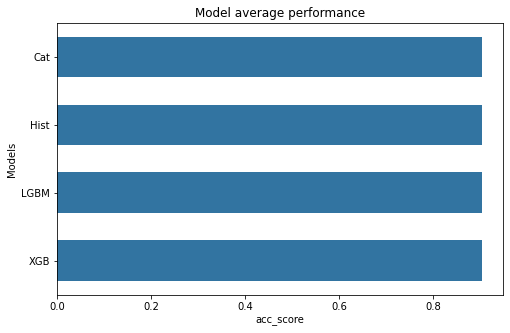

In [26]:
plt.figure(figsize = (8, 5))
plt.title('Model average performance')
sns.barplot(k_fold_result.sort_values(by='acc_score', ascending = False), x='acc_score', 
            y='Models',orient='h',width=0.6)

plt.show()

We see all of these perform similarly. We will trial the Catboost model below.

In [27]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

Split the datasets.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop("NObeyesdad",axis = 1), train_df["NObeyesdad"],
                                                    test_size=0.2, random_state=42)

# t-SNE trial

In [29]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = pd.DataFrame(tsne.fit_transform(X_train),columns = ["dim1","dim2"], index = X_train.index)

X_train_tsne["NObeyesdad"] = enc.inverse_transform(y_train)

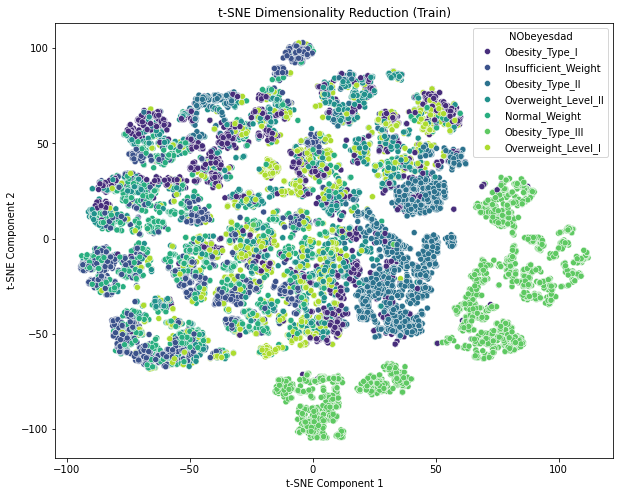

In [30]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='dim1', y='dim2', hue='NObeyesdad',palette='viridis', data=X_train_tsne)
plt.title('t-SNE Dimensionality Reduction (Train)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='NObeyesdad')
plt.show()

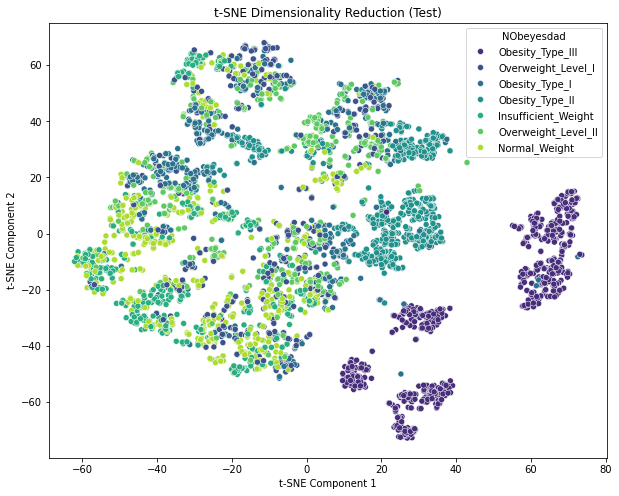

In [31]:
X_test_tsne = pd.DataFrame(tsne.fit_transform(X_test),columns = ["dim1","dim2"], index = X_test.index)

X_test_tsne["NObeyesdad"] = enc.inverse_transform(y_test)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='dim1', y='dim2', hue='NObeyesdad',palette='viridis', data=X_test_tsne)
plt.title('t-SNE Dimensionality Reduction (Test)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='NObeyesdad')
plt.show()

### Key takeaways

- Obesity type III is clearly differenciated from the other group (3 or 4 values from other obesities are shown here as well).
- The other huge cluster has all other categories mixed, so that might not help.

If we see that obesity type III does not differentiate well with the model, we can look into improving it.

# Modelling

## Catboost trial

In [32]:
def objective_catboost(trial):
    cat_params = {
        'iterations': trial.suggest_int('iterations', 50, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10.0),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'thread_count': -1,
        'verbose': False,
        'random_state': 42
    }

    cat_model = CatBoostClassifier(**cat_params)
    cat_model.fit(X_train, y_train, verbose_eval=False)

    score = accuracy_score(y_test, cat_model.predict(X_test))
    return score

study_catboost = optuna.create_study(direction='maximize')
study_catboost.optimize(objective_catboost, n_trials=30, show_progress_bar=True)

  0%|          | 0/30 [00:00<?, ?it/s]

In [33]:
cat_params = study_catboost.best_params

cat_params['thread_count'] = -1
cat_params['verbose'] = False
cat_params['random_state'] = 42

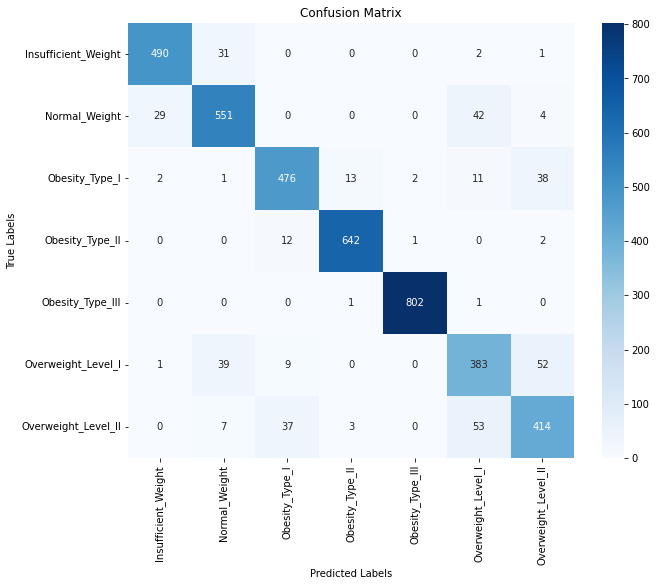

In [34]:
from sklearn.metrics import confusion_matrix

cat_model = CatBoostClassifier(**cat_params)

cat_model.fit(X_train, y_train, verbose_eval=False)

y_pred = cat_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=enc.inverse_transform(range(0,7)), 
            yticklabels=enc.inverse_transform(range(0,7)))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Key Takeaways

- We see that obesity type III is clearly differentiated, so we don't need to use the output of TSNE.
- This can be further improved. Overweight predictions can be further differentiated.

# Test

In [35]:
test = pd.read_csv('test.csv')
test.set_index('id',inplace = True)

In [36]:
test['BMI'] = test['Weight']/(test['Height'])**2

test_df = pd.get_dummies(test, columns = ["Gender","family_history_with_overweight","FAVC","SMOKE","SCC"],
                             prefix = ["Gender","family_history_with_overweight","FAVC","SMOKE","SCC"], drop_first = True)

test_df = pd.get_dummies(test_df, columns = ["CAEC","CALC", "MTRANS"],prefix = ["CAEC","CALC", "MTRANS"])

test_df = test_df.astype('float64')

test_df[numerical_vars] = scaler.transform(test_df[numerical_vars])

In [37]:
test_df = test_df.astype('float64')

test_df.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI,Gender_Male,...,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
id,,,,,,,,,,,,,,,,,,,,,
20758,0.680745,1.131747,0.802168,0.544779,0.000000,1.089803,-0.091554,-0.573887,0.458924,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
20759,-0.302569,-0.763178,-0.396155,-0.393837,-2.000000,1.319966,0.000000,-0.573887,-0.278846,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
20760,0.530764,-0.432302,0.603845,0.606163,0.000000,0.820857,-0.633155,-0.323385,0.923888,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
20761,-0.306027,-1.120903,0.429912,-0.393837,-0.022091,1.038044,-0.573099,-0.573887,1.051787,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
20762,0.530764,-0.554098,0.455487,0.606163,0.000000,0.862639,-0.633155,0.167182,0.789246,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [38]:
test["NObeyesdad"] = cat_model.predict(test_df)

test["NObeyesdad"] = enc.inverse_transform(test["NObeyesdad"])

In [39]:
test["NObeyesdad"].to_csv("Submission.csv")